<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Library importing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange, repeat

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

from flayers.layers import RandomGabor

## Data loading

> We will be using MNIST for a simple and quick test.

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = repeat(X_train, "b h w ->  b h w c", c=1)/255.0
X_test = repeat(X_test, "b h w ->  b h w c", c=1)/255.0

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

## Definition of simple model

In [ ]:
model = tf.keras.Sequential([
    RandomGabor(n_gabors=4, size=20, input_shape=(28,28,1)),
    layers.MaxPool2D(2),
    RandomGabor(n_gabors=4, size=20),
    layers.MaxPool2D(2),
    RandomGabor(n_gabors=4, size=20),
    layers.MaxPool2D(2),
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

2022-09-20 12:47:21.299667: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5435 MB memory:  -> device: 0, name: NVIDIA GeForce GTX TITAN Black, pci bus id: 0000:83:00.0, compute capability: 3.5
2022-09-20 12:47:23.872491: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-20 12:47:24.116626: I tensorflow/core/util/cuda_solvers.cc:180] Creating CudaSolver handles for stream 0x5566d7fd5170


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_gabor_1 (RandomGabor) (None, 28, 28, 4)         1626      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 4)         0         
_________________________________________________________________
random_gabor_3 (RandomGabor) (None, 14, 14, 4)         1626      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
random_gabor_5 (RandomGabor) (None, 7, 7, 4)           1626      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 4)           0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 4)                 0

We can show the initial Gabor filters:

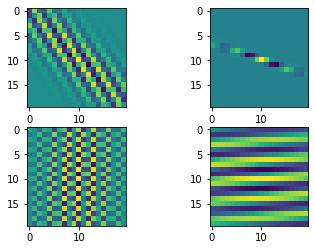

In [ ]:
model.layers[0].show_filters()

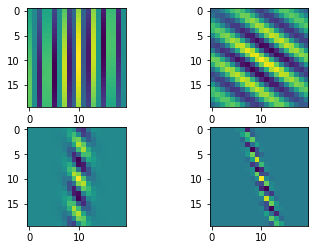

In [ ]:
model.layers[2].show_filters()

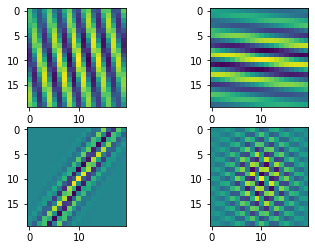

In [ ]:
model.layers[4].show_filters()

In [ ]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=2, validation_split=0.2)

Epoch 1/2


2022-09-20 12:47:43.857300: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2022-09-20 12:47:44.350354: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


375/375 [==============================] - 51s 96ms/step - loss: 2.2364 - accuracy: 0.1946 - val_loss: 2.0396 - val_accuracy: 0.2788
Epoch 2/2
375/375 [==============================] - 36s 96ms/step - loss: 1.9230 - accuracy: 0.3473 - val_loss: 1.7555 - val_accuracy: 0.4182


Showing the training dynamics:

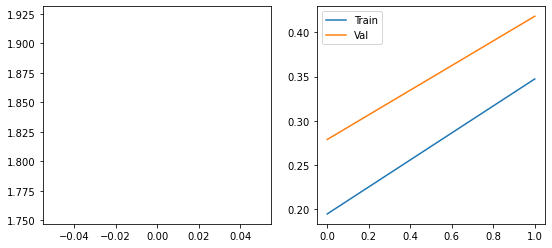

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(9,4))
axes[0].plot(history.history['loss'][1:], label="Train")
axes[0].plot(history.history['val_loss'][1:], label="Val")
axes[1].plot(history.history['accuracy'], label="Train")
axes[1].plot(history.history['val_accuracy'], label="Val")
plt.legend()
plt.show()

Calculate the metrics in the test set:

In [ ]:
model.evaluate(X_test, Y_test, batch_size=128)

79/79 [==============================] - 0s 4ms/step - loss: 1.7527 - accuracy: 0.4212


[1.752727746963501, 0.4212000072002411]

We can visualize the gabor filters after the training process:

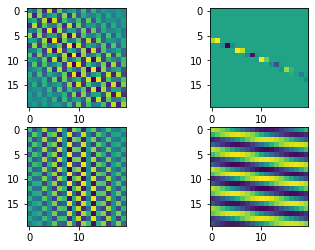

In [ ]:
model.layers[0].show_filters()

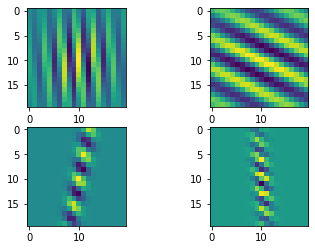

In [ ]:
model.layers[2].show_filters()

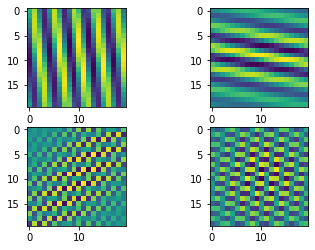

In [ ]:
model.layers[4].show_filters()